# SIR Model
- Susceptible(S) : has not yet been infected and has no inmunity 
- Infect(I) : Current sick and contagius to susceptible neighbors
- Removed(R): Dead and patient that weres infect, they are inmuned  

\begin{equation}
\frac{\mathrm{d}S}{\mathrm{d}t} = -\frac{\beta IS}{N}
\end{equation}

\begin{equation}
\frac{\mathrm{d}I}{\mathrm{d}t} = \frac{\beta IS}{N}-\gamma I
\end{equation}

\begin{equation}
\frac{\mathrm{d}R}{\mathrm{d}t} = -\gamma I
\end{equation}

The  ligature is given by N = S + R + I, where: 
 - *S*: susceptible population
 - *R*: recovered population
 - *I*: Infect


$\beta$: is the average number of contacts per person per time
Tasa de transición, $1/\beta$, es la probabilidad de que un susceptible
se infecte

$\gamma=\frac{1}{D}$, where D is the duration of the infection

$R_0=\frac{\beta}{\gamma}$ : 

In [53]:
#https://www.tandfonline.com/doi/full/10.1080/23737867.2018.1509026

In [184]:
# Solve the equation diferential
#===============================
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pylab as plt
import numpy as np
#===============================

In [194]:
#Gragh for I, R, S 
def graph(t, y):
    size = 16
    plt.figure(figsize=(6,4))
    plt.plot(t, y[:, 0], label = "Susceptible")
    plt.plot(t, y[:, 1], label = "Infect")
    plt.plot(t, y[:, 2], label = "Recovery")
    plt.xlabel("time", fontsize = size)
    plt.ylabel("F(x)", fontsize = size)
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)
    plt.legend()
    plt.xlim(0,50)
    plt.show()
    #return  

#solve equation diferential
def func(y,t,params):
    """
    dsdt = f1, s = y[0]
    dIdt = f2, I = y[1]
    dRdt = f2, R = y[2]
    """
    
    gama  = params[0]
    beta  = params[1]
    N     = params[2]#y[0] + y[1] + y[2] 
    f1 = -(beta * y[1] * y[0] ) / N
    f2 = (beta * y[1] * y[0] ) / N - gama * y[1]
    f3 =  gama * y[1]
    
    return [f1,f2, f3]



0.2
gamma= 0.2
Duration: 5.0
Beta: 0.5599999999999999


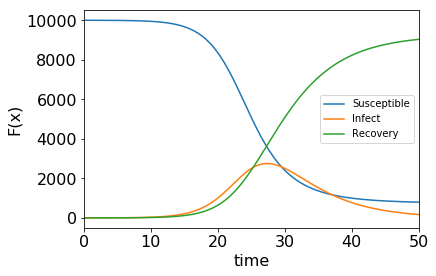

In [245]:
#Initial condition
def initial():
    D    = 5 #time of infection
    gama = 1. / D
    print(gama)
    R0 = 2.8
    beta = gama*R0
    print("gamma=", gama)
    print("Duration:" , (1/gama))
    print("Beta:" , beta)
    return beta, gama
beta, gama = initial()

S = 10000               #Population initial 
I = 1            #Infect
R = 1E-14            #Recovery
N = S
y0 = np.array([S, I, R]) #Initial condition in array 
time = np.linspace(0, 200, 1000)    #Time of integration
t = time
#Integration
params = [gama, beta, N]
y = odeint(func, y0, t, args = (params, ))
graph(t, y)
#odeint()

# SEIR Model
Ref: https://institucional.us.es/blogimus/2020/03/covid-19-analisis-por-medio-de-un-modelo-seir/

- Susceptible(S) : has not yet been infected and has no inmunity 
- Infect(I) : Current sick and contagius to susceptible neighbors
- Exposed (E): Exposed population
- Removed(R): Dead and patient that weres infect, they are inmuned  

\begin{equation}
\frac{\mathrm{d}S}{\mathrm{d}t} = -\frac{\beta IS}{N}
\end{equation}

\begin{equation}
\frac{\mathrm{d}E}{\mathrm{d}t} = -\frac{\beta IS}{N} -\sigma E 
\end{equation}


\begin{equation}
\frac{\mathrm{d}I}{\mathrm{d}t} = \sigma E-\gamma I
\end{equation}

\begin{equation}
\frac{\mathrm{d}R}{\mathrm{d}t} = -\gamma I
\end{equation}

The  ligature is given by N = S + R + I + E, where: 


$\beta$: is the average number of contacts per person per time, 


$\gamma=\frac{1}{D}$, where D is the duration of the infection

$R_0=\frac{\beta}{\gamma}$ : 



En el modelo SEIR tenemos tres parámetros: 𝛽, llamado tasa de transmisión, de manera que 1/𝛽 mide la probabilidad de que un susceptible se infecte cuando entra en contacto con un infectado; 𝛾, llamado tasa de recuperación, de manera que el periodo medio de recuperación es 1/𝛾; y 𝜎, de forma que 1/𝜎 es el tiempo promedio de incubación. Los dos primeros parámetros definen el parámetro 𝑅0=𝛽/𝛾 que se llama tasa básica de reproducción y representa el número de nuevos infectados producidos por un infectado si toda la población es susceptible.

In [255]:
#Gragh for I, R, S 
def graph2(t, y):
    size = 16
    plt.figure(figsize=(6,4))
    plt.plot(t, y[:, 0], label = "Susceptible")
    plt.plot(t, y[:, 1], label = "Exposured")
    plt.plot(t, y[:, 2], label = "Infect")
    plt.plot(t, y[:, 3], label = "Recovery")
    plt.xlabel("time", fontsize = size)
    plt.ylabel("F(x)", fontsize = size)
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)
    plt.xlim(0, max(t))
    plt.legend()
    plt.show()
    #return  


#solve equation diferential
def func2(y,t,params):
    """
    dSdt = f1, S = y[0]
    dEdt = f2, E = y[1]
    dIdt = f3, I = y[2]
    dRdt = f4, R = y[3]
    """
    
    gama  = params[0]
    beta  = params[1]
    sigma = params[2]
    N     = params[3]
    #N =#y[0] + y[1] + y[2] + y[3]
    
    f1 = -(beta * y[2] * y[0] ) / N
    f2 = beta * y[0] * y[2] / N - sigma * y[1]
    f3 = sigma * y[1] - gama * y[2]
    f4 =  gama * y[2]
    
    return [f1,f2, f3, f4]



gamma=  0.2
Beta: 1.0
sigma: 0.14285714285714285
R0: 5.0


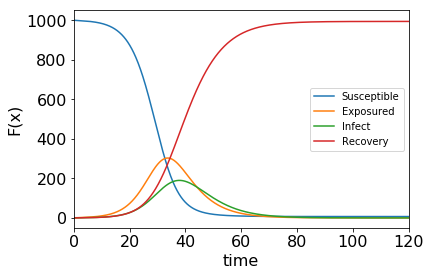

In [257]:
def initial():
    sigma = 1. / 7
    gama =  1. / 5
    beta = 1.
    R0 = beta / gama

    print("gamma= ", gama)
    print("Beta:" , beta)
    print("sigma:" , sigma)
    print("R0:" , R0)
    return beta, gama, sigma
beta, gama, sigma = initial()



S = 1000             #Population initial 
I = 1                  #Infect
R = 1E-14                 #Recovery
E = 1E-14
N = S

y0 = np.array([S, E, I, R])  #Initial condition in array 
time = np.linspace(0, 120, 1000)    #Time of integration
t = time

#Integration
params = [gama, beta, sigma, N]
y = odeint(func2, y0, t, args = (params, ))
graph2(t, y)

## Con medidas gubernamentales, disminuyendo el valor de contagio: 
Ref=https://institucional.us.es/blogimus/2020/03/covid-19-analisis-por-medio-de-un-modelo-seir/


\begin{equation}
\beta(t)= \beta_0((c_0-c_b)e^{-r_1t}+c_b)
\end{equation}

\begin{equation}
\beta = \beta_0 (1-\alpha(t))\left(1-\frac{D(t)}{N}\right)^k      
\end{equation}

- $\beta_0$ es la tasa  de infección
- $\alpha(t)$ acciones gubernamentales, $[0, 1]$
- $D(t)$ es la sensación pública de riesgo dados los casos criticos y muertos conocidos-
- $\kappa$ intensidad de la reacción de los individuos


\begin{equation}
\beta = \left\{ \begin{array}{lcc}
             \beta_0 &   si  & t \leq t_{gov} \\
             \\ \beta_0 (1-\alpha)\left(1-\frac{0,05I(t)}{N}\right)^k      &  si & t> t_{gov}  \
      \end{array}
   \right.    
   \end{equation}

In [312]:
def func2(y,t,params):
    """
    dSdt = f1, S = y[0]
    dEdt = f2, E = y[1]
    dIdt = f3, I = y[2]
    dRdt = f4, R = y[3]
    """
    
    gama  = params[0]
    beta  = params[1]
    sigma = params[2]
    N     = params[3]
   

    beta = beta_f(t, beta, y[2], N)
    
    f1 = -(beta * y[2] * y[0] ) / N
    f2 = beta * y[0] * y[2] / N - sigma * y[1]
    f3 = sigma * y[1] - gama * y[2]
    f4 =  gama * y[2]
    
    return [f1,f2, f3, f4]

def beta_f(t, beta0, I, N):
    k = 100
    alpha = 0.2 #Intensidad de la medida
    if t <= 25:
        return beta0
    else:
        return beta0 * (1 - alpha) * (1 - 0.05 * I/ N)**k



In [313]:
S = 1000           #Population initial 
I = 1            #Infect
R = 1E-14            #Recovery
E = 1E-14
N = S
#====================================
#Primera parte de integracion
#====================================
y0 = np.array([S, E, I, R]) #Initial condition in array 
time1 = np.linspace(0, 100, 10000)    #Time of integration
t1 = time1
#Integration
params = [gama, beta, sigma, N]
y = odeint(func2, y0, t1, args = (params, ))

def initial():
    D     = 5 #time of infection
    sigma = 1./ 7
    gama  = 1./ 5
    beta  = 1.
    R0    = beta/gama
    print("gamma= ", gama)
    print("Duration:" , (1/gama))
    print("Beta:" , beta)
    print("sigma:" , sigma)
    print("R0:" , R0)
    return beta, gama, sigma

beta, gama, sigma = initial()



gamma=  0.2
Duration: 5.0
Beta: 1.0
sigma: 0.14285714285714285
R0: 5.0


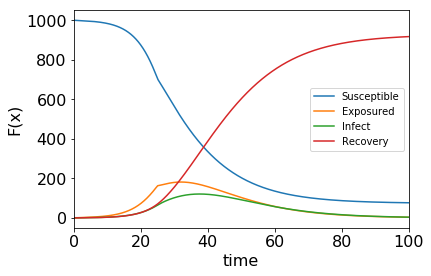

In [315]:
def graph2(t, y):
    size = 16
    plt.figure(figsize=(6,4))
    plt.plot(t1, y[:, 0], label = "Susceptible")
    plt.plot(t1, y[:, 1], label = "Exposured")
    plt.plot(t1, y[:, 2], label = "Infect")
    plt.plot(t1, y[:, 3], label = "Recovery")
    plt.xlabel("time", fontsize = size)
    plt.ylabel("F(x)", fontsize = size)
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)
    plt.xlim(0, 100)
#    plt.ylim(0, 2000)
    plt.legend()
    plt.show()

graph2(t1, y)


84.84088792843089



# Datos actuales del Covid

In [274]:
import pandas as pd
import re
import datetime
from scipy.optimize import curve_fit

In [279]:
#Ref: git hub Diego Restrepo
cva = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
cva = cva.reset_index(drop = True)

size = 18
def day_zero(pais):
    data = cva[cva["Country/Region"]==pais]    
    d = data.values[0][4:]
    day_zero = d>0
    d = d[day_zero]
    return d

def graph_covid19(dat, dic):
    n=len(dat)
    plt.figure(figsize = (14,6))
    plt.subplot(121)
    
    for i in range(0,n):
        pais = dic[i]
        plt.plot(dat[i], label = pais)
    plt.xscale("linear")
    plt.yscale("linear")
    plt.xlim(0,60)
    plt.xlabel("dias", fontsize = size)
    plt.ylabel("Casos confirmados", fontsize = size)
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)
    plt.legend(fontsize=14)

    plt.subplot(122)
    for i in range(0,n):
        pais = dic[i]
        plt.plot(dat[i], label = pais)  
    plt.xscale("linear")
    plt.yscale("log")
    plt.xlim(0,60)
    plt.xlabel("dias", fontsize = size)
    plt.ylabel("(Log) Casos confirmados", fontsize = size)
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)
    plt.legend(fontsize=14)
  

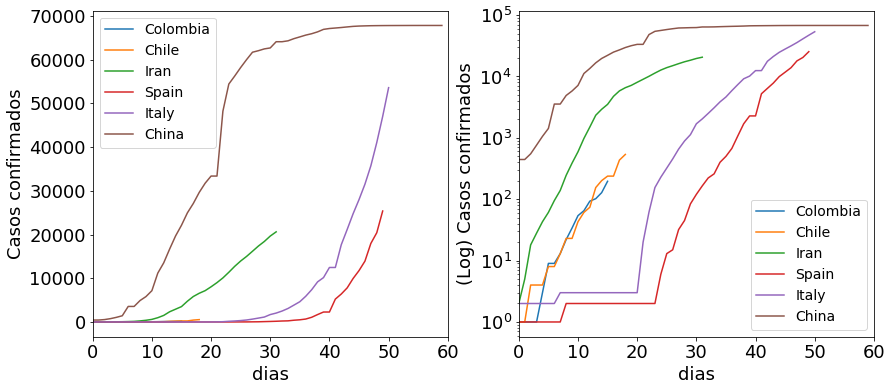

In [307]:
dic={0:"Colombia", 1: "Chile", 2: "Iran", 3: "Spain", 4: "Italy", 5: "China"}
dat=[]
for i in range(0, len(dir)):
    dat.append(day_zero(dic[i]))
graph_covid19(dat, dic)

# Model:  exponential function

In [272]:
#Equation for fit 
def fun_exp(x, a, b, c ):
    
    return a * np.exp(b*x) + c


#Fit exp 
def fit_exp(d):
    
    t1 = np.arange(1, len(d) + 1, 1)
    
    popt, pcov = curve_fit(fun_exp, t1, d)
    
    return popt, pcov



t_fit = np.linspace(1, 50, 100)
f_col = fit_exp(d1)
params = f_col[0]
t_day = np.arange(1, len(d1)+1,1 )
#fun_exp(t, *params)
    


<Figure size 432x288 with 0 Axes>

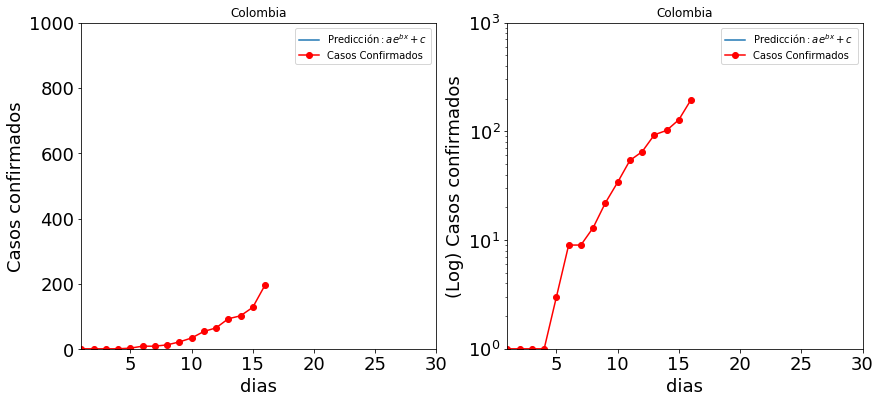

In [280]:
plt.figure()

plt.figure(figsize = (14,6))
plt.subplot(121)
plt.plot(t, fun_exp(t, *params), label = "$\mathrm{Predicción:}ae^{bx} + c$")
plt.plot(t_day, d1, "ro-", label =  "Casos Confirmados")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("dias", fontsize = size)
plt.ylabel("Casos confirmados", fontsize = size)
plt.xticks(fontsize = size)
plt.yticks(fontsize = size)
plt.xlim(1, 30)
plt.ylim(1, 10**3)
plt.title("Colombia")
plt.legend()
  

plt.subplot(122)
plt.plot(t, fun_exp(t, *params), label = "$\mathrm{Predicción:}ae^{bx} + c$")
plt.plot(t_day, d1, "ro-", label =  "Casos Confirmados")
plt.xscale("linear")
plt.yscale("log")
plt.xlabel("dias", fontsize = size)
plt.ylabel("(Log) Casos confirmados", fontsize = size)
plt.xticks(fontsize = size)
plt.yticks(fontsize = size)
plt.xlim(1, 30)
plt.ylim(1, 10**3)
plt.title("Colombia")
plt.legend()
 
#plt.ylim(0,10000 )

In [90]:
import requests
r=requests.get('https://infogram.com/covid-2019-ins-colombia-1hnq41zg9ord63z')


In [124]:
head = '"data":[[["ID de caso",'
tail = ']]]'
js = '{}{}{}'.format( head.split(':')[-1],
                 r.text.split(head)[-1].split(tail)[0],
                 tail
             )

df=pd.read_json(js)

coco=pd.DataFrame([l for l in df[range(1,190)].values[0]],columns=df[0][0] )
#coco

In [130]:
dir = {"0 a 9": -1, "10 a 19": 0, 
       "20 a 29": 1, "30 a 39": 2, 
       "40 a 49": 3, "50 a 59": 4, 
       "60 a 69": 5, "70 a 79": 6, 
       "80 a 89": 7, "60 a  69":5 }


In [132]:
edad = coco["Edad"].values 
f = []
for e in edad:
    #print (e)
    f.append(dir[e])


In [133]:
dir_sex={"F":0, "M":1}
dir_type={"Importado":0, "Relacionado":1, "En estudio"}

sexo = coco["Sexo"].values 
tipo = coco["Tipo*"].values

f1 = []
for e in edad:
    f1.append(dir[e])


In [134]:
f1 = []
for t in tipo: 
#    print(t)
    f1.append(dir_type[t])

(array([117.,   0.,   0.,   0.,   0.,  65.,   0.,   0.,   0.,   7.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

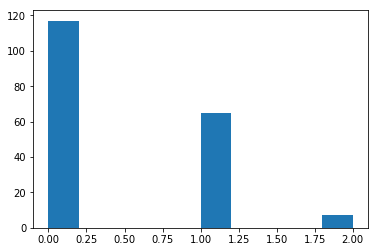

In [135]:
plt.hist(f1)

(array([117.,  72.]), array([0., 1., 2.]), <a list of 2 Patch objects>)

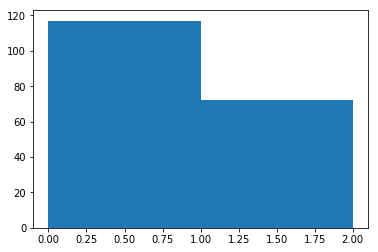

In [136]:
plt.hist(f1, bins=2)

In [45]:
cva = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
cva = cva.reset_index(drop=True)

def day_zero(pais):
    data = cva[cva["Country/Region"]==pais]    
    d = data.values[0][4:]
    day_zero = d>0
    d = d[day_zero]
    return d



In [46]:
cva[[]].values

array([], shape=(477, 0), dtype=float64)